In [1]:
import pandas as pd
import numpy as np
import random as rd
import seaborn as sbs
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from matplotlib import pyplot

In [2]:
#from google.colab import drive

#drive.mount('/content/drive')
#arquivo = '/content/drive/MyDrive/Colab Notebooks/MAT33 IA/DS_Agua_2017_2022.csv'

In [3]:
file_data = 'DS_Agua_2017_2022.csv'
path_name='data/'
arquivo = f'{path_name}{file_data}'

In [4]:
dataset = pd.read_csv(arquivo, sep =';', encoding = 'latin1', decimal='.')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45240 entries, 1 to 45240
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DT_MEDICAO_HORA         45240 non-null  object 
 1   PRECIPITACAO            45240 non-null  float64
 2   PRESSAO_ATMOSFERICA     45240 non-null  float64
 3   TEMPERATURA_DO_AR_C     45240 non-null  float64
 4   UMIDADE_RELATIVA_DO_AR  45240 non-null  float64
 5   VELOCIDADE_VENTO        45240 non-null  float64
 6   VL_MEDICAO              45240 non-null  float64
dtypes: float64(6), object(1)
memory usage: 2.8+ MB


In [6]:
#verifica se existe variáveis nulas 
dataset.isna().sum()

DT_MEDICAO_HORA           0
PRECIPITACAO              0
PRESSAO_ATMOSFERICA       0
TEMPERATURA_DO_AR_C       0
UMIDADE_RELATIVA_DO_AR    0
VELOCIDADE_VENTO          0
VL_MEDICAO                0
dtype: int64

In [7]:
dataset.head(10)

,DT_MEDICAO_HORA,PRECIPITACAO,PRESSAO_ATMOSFERICA,TEMPERATURA_DO_AR_C,UMIDADE_RELATIVA_DO_AR,VELOCIDADE_VENTO,VL_MEDICAO
1,2017-01-01 00:00:00,0.0,1009.5,25.9,75.0,1.3,5016.845991
2,2017-01-01 01:00:00,0.0,1009.6,25.7,76.0,0.9,4998.296902
3,2017-01-01 02:00:00,0.0,1009.2,25.6,76.0,1.1,5013.330096
4,2017-01-01 03:00:00,0.0,1008.4,25.9,77.0,1.7,4972.739746
5,2017-01-01 04:00:00,0.0,1008.1,23.7,85.0,1.7,4921.942265
6,2017-01-01 05:00:00,0.2,1007.5,23.7,87.0,0.4,4838.136258
7,2017-01-01 06:00:00,0.0,1007.3,24.2,88.0,0.5,4833.215005
8,2017-01-01 07:00:00,0.0,1007.3,24.2,87.0,0.7,4795.247653
9,2017-01-01 08:00:00,0.0,1007.7,24.7,85.0,1.0,4763.098501
10,2017-01-01 09:00:00,0.0,1008.5,25.1,83.0,1.2,4715.598748


In [8]:
#tratando o dataframe
df = pd.DataFrame()
df['VL_MEDICAO']=dataset['VL_MEDICAO']

#transformação da série => janela deslizande com 1 passo de tempo
n=1
df['vl-n']=dataset['VL_MEDICAO'].shift(n)
df['tp-n']=dataset['TEMPERATURA_DO_AR_C']
df['pr-n']=dataset['PRESSAO_ATMOSFERICA']
df['vv-n']=dataset['VELOCIDADE_VENTO']
df['ur-n']=dataset['UMIDADE_RELATIVA_DO_AR']
df['ch-n']=dataset['PRECIPITACAO']

df.dropna(inplace=True)
df.head(15)

,VL_MEDICAO,vl-n,tp-n,pr-n,vv-n,ur-n,ch-n
2,4998.296902,5016.845991,25.7,1009.6,0.9,76.0,0.0
3,5013.330096,4998.296902,25.6,1009.2,1.1,76.0,0.0
4,4972.739746,5013.330096,25.9,1008.4,1.7,77.0,0.0
5,4921.942265,4972.739746,23.7,1008.1,1.7,85.0,0.0
6,4838.136258,4921.942265,23.7,1007.5,0.4,87.0,0.2
7,4833.215005,4838.136258,24.2,1007.3,0.5,88.0,0.0
8,4795.247653,4833.215005,24.2,1007.3,0.7,87.0,0.0
9,4763.098501,4795.247653,24.7,1007.7,1.0,85.0,0.0
10,4715.598748,4763.098501,25.1,1008.5,1.2,83.0,0.0
11,4712.059896,4715.598748,26.2,1009.0,1.5,77.0,0.0


In [9]:
#Cria os vetores de X e y para terinamento e teste
vl_medicoes = df.iloc[:,0].values

X = df.iloc[0:dataset.shape[0],1:7]

#Definindo os datasets de treinamento e teste
#X_train, X_test, y_train, y_test = train_test_split(X, vl_medicoes, test_size=0.1, random_state= 1)


In [10]:

#Do total de 45239 linhas, foram separadas 75% para treinamento e 25% para teste
nlinhas = int(np.round(X.shape[0] * 0.75)) # 

#nlinhas = 33929 # 75% do dataset
X_train = df.iloc[0:nlinhas,1:7]
X_test = df.iloc[nlinhas:X.shape[0],1:7]

y_train = df.iloc[0:nlinhas,0].values
y_test = df.iloc[nlinhas:X.shape[0],0].values


In [11]:
from sklearn.model_selection import TimeSeriesSplit
# Validador cruzado para séries temporais para 5 conjuntos de dados
ts_cv = TimeSeriesSplit(
    n_splits=5, # Número de divisões 
    max_train_size=6785,    # tamanho máximo de cada conj. de treinamento
    gap=2, # número de amostras a serem excluídas entre cada conjunto de treinamento e teste
    test_size=2261, # tamanho máximo de cada conj. de teste.
)
C = [ 1000, 10000,100000] # Parâmetro de regularização
gamma = [0.0000001, 0.000001, 0.00000001] # Coeficiente da função kernel  
epsilon = [0.001, 0.0001, 0.00001]
hyper_params = [{'kernel': ['rbf'],'C': C, 'gamma':gamma, 'epsilon':epsilon}]  

modelo = SVR()
grid = GridSearchCV(modelo,param_grid=hyper_params,verbose=20,n_jobs=-4,cv=ts_cv)
                   #scoring='neg_mean_absolute_percentage_error')
grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=TimeSeriesSplit(gap=2, max_train_size=6785, n_splits=5, test_size=2261),
             estimator=SVR(), n_jobs=-4,
             param_grid=[{'C': [1000, 10000, 100000],
                          'epsilon': [0.001, 0.0001, 1e-05],
                          'gamma': [1e-07, 1e-06, 1e-08], 'kernel': ['rbf']}],
             verbose=20)

In [12]:
print(grid.best_params_) 

{'C': 10000, 'epsilon': 0.0001, 'gamma': 1e-07, 'kernel': 'rbf'}


In [13]:
print('Melhor score:', grid.best_score_)
print('Melhor Kernel:',grid.best_estimator_.kernel)
print('Melhor Gamma:',grid.best_estimator_.gamma)
print('Melhor C:',grid.best_estimator_.C) 

Melhor score: 0.616094803073395
Melhor Kernel: rbf
Melhor Gamma: 1e-07
Melhor C: 10000


In [14]:
predict=grid.predict(X_test)
predict

array([8495.10199308, 8509.22739333, 8579.27917094, ..., 8666.54335795,
       8872.39014339, 8871.6253191 ])

In [15]:
#Estimate Et for treinam and test
# For treinam data
Lt_train = grid.predict(X_train)
Yt_train = y_train
Et_train = Yt_train - Lt_train

# For test data
Lt_test = predict
Yt_test = y_test
Et_test = Yt_test - Lt_test

In [16]:
# MAPE statistics for test data
((np.mean(np.abs(Yt_test - Lt_test) / (Yt_test)))) * 100

4.8746972078792545

In [17]:
# MAPE statistics for treinam data
((np.mean(np.abs(Yt_train - Lt_train) / (Yt_train)))) * 100

2.6623841689297656

In [18]:
#create  dataframe of Et value
df_Et = pd.DataFrame(Et_train, columns=['VL_Et'])
n_time_steps =2

for n_step in range(1,n_time_steps+1,1):
    df_Et['vl-'+str(n_step)]=df_Et['VL_Et'].shift(n_step)  

#drop rows with null values
df_Et.dropna(inplace=True)

Nt_train = df_Et['VL_Et']

df_Et.drop(['VL_Et'],axis=1, inplace=True)

X_train = df_Et
y_train = Nt_train

In [22]:
# MLP model for hybrid prediction for non linear component Et_train 

#Split dataset in treinam /  75% treinam  25% test
nlinhas = int(np.round(X_train.shape[0] * 0.75)) # 
  
max_size_train_split = int(np.round(nlinhas / 5)) 
max_size__test_split = int(np.round((X_train.shape[0] - nlinhas) / 5))
size_split = 5
  
# Cross-validated for time series
ts_cv_mlp = TimeSeriesSplit(
      n_splits=size_split, # Number of divisions
      max_train_size=max_size_train_split,    # maximum size of each set. of training
      gap=2, # number of samples to exclude between each training and testing set
      test_size=max_size__test_split, # maximum size of each set. of test.
)

param_grid = {
     'hidden_layer_sizes': [(4,6,1),(2,6,1),(6,12,1),(6,18,1)], # MLP layers
     'max_iter': [ 500], # maximum iterations
     'activation': [ 'relu','identity'], # activation function
     'solver': ['adam'], # weight optimization algorithm
     'alpha': [0.0001, 0.001, 0.01],  # alpha strength of regularization
}
  
modelo = MLPRegressor(random_state=0)
  
grid_mlp = GridSearchCV(modelo, param_grid, n_jobs= -1,scoring='neg_mean_absolute_percentage_error', cv=ts_cv_mlp, verbose=1)
grid_mlp.fit(np.array(X_train), np.array(y_train))

resultado = str(grid.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [23]:
#MAPE to Et predicted on MLP Model
predict=grid_mlp.predict(X_train)  
((np.mean(np.abs(y_train - predict) / (y_train)))) * 100

c:\Python\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


7.99759553882681

In [24]:
# Recomposition of Nt + Lt form train data
Lt_train2 = Lt_train[n_time_steps:len(Lt_train)]
Yt_train2 = Yt_train[n_time_steps:len(Yt_train)]
Yt_train_predicted = predict + Lt_train2
((np.mean(np.abs(Yt_train2 - Yt_train_predicted) / (Yt_train2)))) * 100

2.6614471873820187

In [25]:
y_test = Yt_train2
predict = Yt_train_predicted

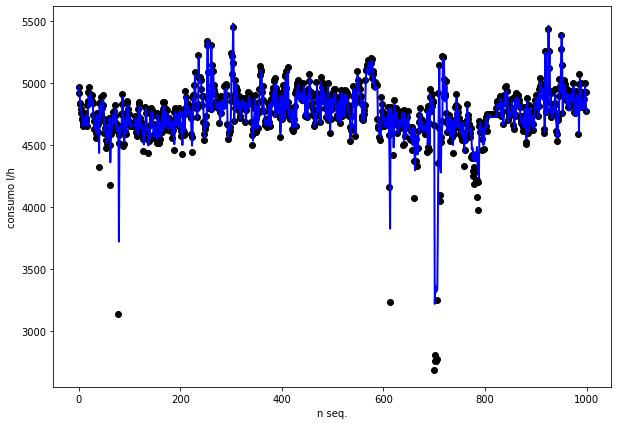

In [26]:
#O gráfico abaixo mostra os valores reais em preto e os valores prditos em azul
npredicts=1000
pyplot.figure(figsize=(10,7)) 
pyplot.scatter(np.arange(0,y_test.shape[0],1)[0:npredicts],np.array(y_test)[0:npredicts], color = 'black')
pyplot.plot(np.arange(0,predict.shape[0],1)[0:npredicts], np.array(predict)[0:npredicts], color = 'blue', linewidth=2)
pyplot.xlabel('n seq.')
pyplot.ylabel('consumo l/h')
pyplot.show()

In [27]:
# For test data
#Lt_test = predict
#Yt_test = y_test
#Et_test = Yt_test - Lt_test


#create  dataframe of Et value
df_Et = pd.DataFrame(Et_test, columns=['VL_Et'])

for n_step in range(1,n_time_steps+1,1):
    df_Et['vl-'+str(n_step)]=df_Et['VL_Et'].shift(n_step)  

#drop rows with null values
df_Et.dropna(inplace=True)

Nt_test = df_Et['VL_Et']

df_Et.drop(['VL_Et'],axis=1, inplace=True)

X_test = df_Et
y_test = Nt_test

#MAPE to Et predicted on MLP Model
predict=grid_mlp.predict(X_test)  
((np.mean(np.abs(y_test - predict) / (y_test)))) * 100

# Recomposition of Nt + Lt form train data
Lt_test2 = Lt_test[n_time_steps:len(Lt_test)]
Yt_test2 = Yt_test[n_time_steps:len(Yt_test)]
Yt_test_predicted = predict + Lt_test2
((np.mean(np.abs(Yt_test2 - Yt_test_predicted) / (Yt_test2)))) * 100

c:\Python\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


4.886657929519054

In [28]:
y_test = Yt_test2
predict = Yt_test_predicted

In [29]:
#Validação dos resultados

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

#Erro médio quadrático  (diferença quadrática média entre os valores estimados e valores reais) - MSE
mean_squared_error(y_test, predict)


1035070.5690528748

In [30]:
#Raiz quadrada do Erro médio - RMSE
np.sqrt(mean_squared_error(y_test, predict))


1017.384179674952

In [31]:
#Distância absoluta média ou Erro médio absoluto - MAE
median_absolute_error(y_pred=predict, y_true = y_test)


124.08705702609996

In [32]:
#Calcular o MAPE (Erro médio percentual absoluto)
MAPE = ((np.mean(np.abs(y_test -predict) / (y_test)))) * 100
MAPE

4.886657929519054